# DATA PREPARATION

I am using python, pandas, and matploylib for data preparation and visualization. For reading the CSV online directly from the google sheet, I was required to authenticate the google account so I downloaded the file. Please replace the file location below with the location URL to run the code. 

In [58]:
# Using pandas for working with data frames
import pandas as pd

# Stored the location of the csv file
url = "Desktop/dataset.csv"

# Created a dataframe using the CSV
df = pd.read_csv(url)

# Uncomment head to see the top few rows of data frame
# df.head()

# DATA VISUALIZATION

I am trying to visualize and analyze the data by grouping them and discovering the trends to find relationships.

In [59]:
# Get a general description of the dataframe including mean, min, max, etc.
df.describe()

,Session_num,VisitCount,ServiceDurationInSeconds
count,6637.000000,6637.000000,6637.000000
mean,193.669429,6.830646,801.910954
std,111.089056,15.588881,372.913355
min,1.000000,1.000000,180.000000
25%,96.000000,1.000000,540.000000
50%,194.000000,2.000000,725.000000
75%,292.000000,6.000000,975.000000
max,381.000000,170.000000,3457.000000


*Grouping -* I am using groupby to see the total service time for each day of the week according to the time of the day AM/PM

In [60]:
# Grouping to see total service time everyday of week
daily = df.groupby("Day")["ServiceDurationInSeconds"].sum()

print(daily)

Day
Friday        123538
Saturday     2751822
Tuesday        76855
Wednesday    2370068
Name: ServiceDurationInSeconds, dtype: int64


In [61]:
# Grouping to see the total service time according to AM/PM
AM_PM = df.groupby("TimeInDay")["ServiceDurationInSeconds"].sum()

print(AM_PM)

TimeInDay
afternoon    2654836
morning      2667447
Name: ServiceDurationInSeconds, dtype: int64


In [62]:
# Grouping data to see the total service time for each day according to AM/PM
daily_visits = df.groupby(["Day","TimeInDay"])["ServiceDurationInSeconds"].sum()

print(daily_visits)

Day        TimeInDay
Friday     afternoon      58667
           morning        64871
Saturday   afternoon    1404398
           morning      1347424
Tuesday    afternoon      36038
           morning        40817
Wednesday  afternoon    1155733
           morning      1214335
Name: ServiceDurationInSeconds, dtype: int64


# Feature Engineering

Using One Hot Encoding to transform categorical data into numerical data and add new columns in the data frame for IsWeekEnd and WorkDay to add features in model.

In [63]:
# Transform AM/PM into 0 and 1
df["TimeInDay"] = (df["TimeInDay"] == "morning").astype(int)

# Map to transform days of the week
week_day = {
    "Monday": 0, 
    "Tuesday": 1, 
    "Wednesday": 2, 
    "Thursday": 3, 
    "Friday": 4, 
    "Saturday": 5, 
    "Sunday": 6}

# Used the map to encode days of the week
df["Day"] = df["Day"].map(week_day)

# df.head(2000)

In [64]:
# See the grouping with encoded data
daily_AM_PM = df.groupby(["Day", "TimeInDay"])["ServiceDurationInSeconds"].sum()
print(daily_AM_PM)

Day  TimeInDay
1    0              36038
     1              40817
2    0            1155733
     1            1214335
4    0              58667
     1              64871
5    0            1404398
     1            1347424
Name: ServiceDurationInSeconds, dtype: int64


In [65]:
# Created a new data frame with the grouped data for plotting
new_df = daily_AM_PM.reset_index()
new_df.head(8)

,Day,TimeInDay,ServiceDurationInSeconds
0,1,0,36038
1,1,1,40817
2,2,0,1155733
3,2,1,1214335
4,4,0,58667
5,4,1,64871
6,5,0,1404398
7,5,1,1347424


<Axes: >

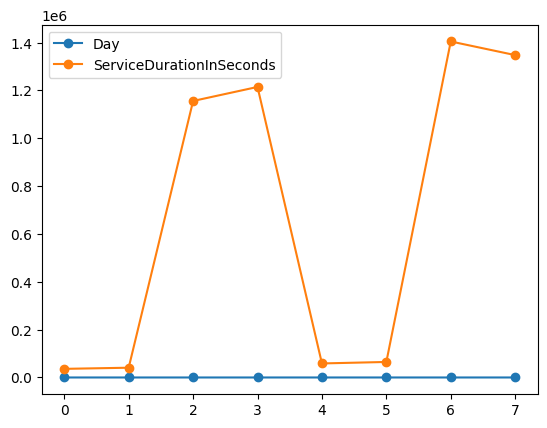

In [66]:
# Plot for the service time sum for each day of the week
new_df.plot(kind='line', y = ['Day','ServiceDurationInSeconds'], marker = 'o')

# DATA ANALYSIS

In [67]:
# Grouping to check skin cancer rate
cancer_rate_gender = df.groupby(["Gender","SkinCancer"])["SkinCancer"].count()

print(cancer_rate_gender)

Gender  SkinCancer
F       False         3885
        True            58
M       False         2685
        True             9
Name: SkinCancer, dtype: int64


In [68]:
# Grouping to check malignant cancer rate
malignant_rate_gender = df.groupby(["Gender","MalignantCancer"])["MalignantCancer"].count()

print(malignant_rate_gender)

Gender  MalignantCancer
F       False              3586
        True                357
M       False              2431
        True                263
Name: MalignantCancer, dtype: int64


In [69]:
# Grouping to see the number of visits on weekdays and weekends
workday_visits = df.groupby(["IsWorkDay"])["VisitCount"].count()

print(workday_visits)

IsWorkDay
False    3438
True     3199
Name: VisitCount, dtype: int64


# PREDICTION MODEL

Used scikit learn for creatng models. Experimented with multiple models to find the best estimator. Added new feature columns while encoding it to align with the model requirements.

In [81]:
# Imports
# Train_test_split to split the dataset into training and testing data
from sklearn.model_selection import train_test_split

# To calculate the mean absolute error between prediction and actual data
from sklearn.metrics import mean_absolute_error

In [82]:
# Creating a new feature column for the day being a weekend falling on Saturday or Sunday
df["IsWeekEnd"] = df["Day"].isin([5,6]).astype(int)

# Creating a new feature column for the day being a workday
df["WorkDay"] = df["IsWorkDay"].astype(int)

# df.head()

In [109]:
# Creating features and labels for training the model
features = ["Day","TimeInDay","VisitCount","IsWeekEnd","WorkDay"]
X = df[features]
y = df["ServiceDurationInSeconds"]

# Spliting the data set for training (75%) and testing (25%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.20, shuffle = True)

**Using Linear Regression**

In [110]:
# Importing scikit learn to use the machine learning models
from sklearn.linear_model import LinearRegression

# Using simple regression model
model = LinearRegression()

# Training model
model.fit(X_train, y_train)

# Predicting
predict = model.predict(X_test)
# print(predict)

# Calculating the mean error to know how off are the predictions
mae = mean_absolute_error(y_test, predict)
print(mae)

275.64939725601596


**RESULTS -** By using simple linear regression we can see that the mean absolute error is pretty high in predctions.

**Using Decision Tree Regressor**

In [111]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predict = model.predict(X_test)
mae = mean_absolute_error(y_test, predict)
print(mae)

277.4882068886973


**Using Support Vector Regression**

In [112]:
from sklearn.svm import SVR
model = SVR(C=2.0, epsilon=0.8)
model.fit(X_train, y_train)
predict_svr = model.predict(X_test)
mae_svr = mean_absolute_error(y_test, predict_svr)
print(mae_svr)

269.948896181301


**Using Support Vector Classification**

In [113]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
predict_calibrate = model.predict(X_test)
mae_c = mean_absolute_error(y_test, predict_calibrate)
print(mae_c)

284.80647590361446


**Using Random Forest**

In [115]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
forest_predict = model.predict(X_test)
mae = mean_absolute_error(y_test, forest_predict)
print(mae)

275.66981461648413


# RESULTS